In [ ]:
import matplotlib.pyplot as plt
import subprocess as sp
import numpy as np

#plt.rc('text', usetex=False)
#plt.rcParams['figure.figsize']=[12,8]
#plt.rc('figure', titlesize=16*4/2)
#plt.rcParams['axes.formatter.use_locale']=True

: 

In [ ]:
class Magnet:
    matrix=[[]]
    def __init__(self,R,Z,M,x,y):
        self.R=R
        self.Z=Z
        self.M=M
        self.x=x
        self.y=y

#admat uwzględnia kierunki sił, dlatego jest taki rozbudowany (jest to dodawanie macierzy sił dla wszystkich magnesów, nic więcej)
def admat(mgnts):
    finalx=[]
    for i in range(len(mgnts[0].matrix)): #czy w dobrej kolejności te fory?
        row=[]
        for k in range(len(mgnts[0].matrix[0])):
            row.append(0)
        finalx.append(row)
    finaly=[]
    for i in range(len(mgnts[0].matrix)): 
        row=[]
        for k in range(len(mgnts[0].matrix[0])):
            row.append(0)
        finaly.append(row)
    final =[]
    for i in range(len(mgnts[0].matrix)): 
        row=[]
        for k in range(len(mgnts[0].matrix[0])):
            row.append(0)
        final.append(row)

    
    for m in mgnts:
        #teraz będziemy rzutować na osie wszystkie wartości:
        for i in range(len(m.matrix)):
            for j in range(len(m.matrix[i])):
                x_part, y_part=[(i-m.x)*m.matrix[i][j],(j-m.y)*m.matrix[i][j]]#wcześniej też był liczony po i,j
                finalx[i][j]+=(x_part)
                finaly[i][j]+=(y_part)
    
    for i in range(len(final)):
        for j in range(len(final[i])):
            final[i][j]=np.sqrt(finalx[i][j]**2+finaly[i][j]**2)
        
    return final
    
def distance(x,y,mag_x,mag_y):
    return [xlen/nx*(x-mag_x), ylen/ny*(y-mag_y)]

In [ ]:
MAGNETISATION = -100

#poniżej znajdują się inicjalizacje, to jest różne ułożenia magnesów mniejszych wokół większego. wszystkie zakładają, że rzecz będzie symetryczna
#inicjalizację stosuje się tylko w następnej komurce, wystarczy wpisać parametry opisujące ułożenie (odległość między innymi) magnesów względem siebie

def init_4(Z,R,r,w,y0):
    x0=nx/2-0.5
    mc = Magnet(R,Z,MAGNETISATION,x0,0+y0)
    m1 = Magnet(r,Z,MAGNETISATION,x0-w/2,-w/2+y0)
    m2 = Magnet(r,Z,MAGNETISATION,x0+w/2,-w/2+y0)
    m3 = Magnet(r,Z,MAGNETISATION,x0-w/2,w/2+y0)
    m4 = Magnet(r,Z,MAGNETISATION,x0+w/2,w/2+y0)    
    return [mc,m1,m2,m3,m4]

#init_5 wymaga dopracowania
def init_5(Z,R,r,a,y0):
    x0=nx/2-0.5
    phi0 = np.pi/5
    mc = Magnet(R,Z,MAGNETISATION,x0,0+y0)
    m1 = Magnet(r,Z,MAGNETISATION,x0+a*np.sin(2*np.pi/5+phi0),a*np.cos(2*np.pi/5+phi0)+y0)
    m2 = Magnet(r,Z,MAGNETISATION,x0+a*np.sin(4*np.pi/5+phi0),a*np.cos(4*np.pi/5+phi0)+y0)
    m3 = Magnet(r,Z,MAGNETISATION,x0+a*np.sin(6*np.pi/5+phi0),a*np.cos(6*np.pi/5+phi0)+y0)
    m4 = Magnet(r,Z,MAGNETISATION,x0+a*np.sin(8*np.pi/5+phi0),a*np.cos(8*np.pi/5+phi0)+y0)
    m5 = Magnet(r,Z,MAGNETISATION,x0+a*np.sin(10*np.pi/5+phi0),a*np.cos(10*np.pi/5+phi0)+y0)

    return [mc,m1,m2,m3,m4,m5]
#init_6 wymaga napisania

def init_6(Z,R,r,b,y0):
    x0=nx/2-0.5
    mc = Magnet(R,Z,MAGNETISATION,x0,0+y0)
    m1 = Magnet(r,Z,MAGNETISATION,x0+b*np.cos(2*np.pi/6),b*np.sin(2*np.pi/6)+y0)
    m2 = Magnet(r,Z,MAGNETISATION,x0+b*np.cos(4*np.pi/6),b*np.sin(4*np.pi/6)+y0)
    m3 = Magnet(r,Z,MAGNETISATION,x0+b*np.cos(6*np.pi/6),b*np.sin(6*np.pi/6)+y0)
    m4 = Magnet(r,Z,MAGNETISATION,x0+b*np.cos(8*np.pi/6),b*np.sin(8*np.pi/6)+y0)
    m5 = Magnet(r,Z,MAGNETISATION,x0+b*np.cos(10*np.pi/6),b*np.sin(10*np.pi/6)+y0)
    m6 = Magnet(r,Z,MAGNETISATION,x0+b*np.cos(12*np.pi/6),b*np.sin(12*np.pi/6)+y0)

    return [mc,m1,m2,m3,m4,m5,m6]

: 

In [ ]:
#wartości inicjalizacji:
xlen = 20
ylen = 20
nx=6
ny=10
#ny jest długością; y=0 to pierwsza kolumna, y=ny-1 to ostatnia, analogicznie nx

#test_mag... jest właściwie bez znaczenia - moment magnetyczny dipolu postaci pochodnej delty Diraca
test_magnetisation=1

magnets=init_5(0.2,2,0.8,4,-5)



for ms in magnets:
    matrix=[]
    for i in range(nx):
        row=[]
        for k in range(ny):
            row.append(0)
        matrix.append(row)
    ms.matrix=matrix

: 

In [139]:
#teraz budowanie macierzy każdego z magnesów
#kalkulowanie 100 pól dla 1 magnesu przy INT_RES=200 to ~25 sekund
for k in range(len(magnets)):
    m = magnets[k]
    for i in range(nx):
        for j in range(ny): 
            l0x, l0y = distance(i, j, m.x, m.y)
            sp.run(['./integral',str(m.R),
            str(m.Z),str(test_magnetisation),str(m.M),str(l0x),str(l0y)])

            with open('can.txt','r') as File:
                m.matrix[i][j] = float(File.readlines()[0])
            File.close()

        #print('skończono pętlę: ', i+1)
    print('skończono magnes nr ', k+1)
#output czasem wariuje, ale macierz działą#nie mam pojęcia co dzieje się z outputem, ale przynajmniej macierz działa

skończono magnes nr  1
skończono magnes nr  2
skończono magnes nr  3
skończono magnes nr  4
skończono magnes nr  5
skończono magnes nr  6


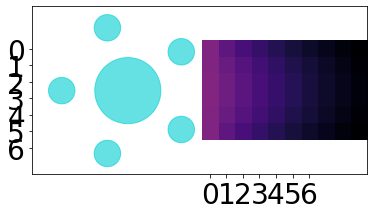

In [140]:
fig,ax = plt.subplots()
fig.set_size_inches(nx,ny)


#określenie macieży rysowanej:
final = admat(magnets)
final = np.array([np.array(ms) for ms in final])



#skalowanie potęgowe - żeby poprawić widoczność, równie dobrze można określić cmap potęgową.
im = ax.imshow((final**2)**(0.25/2),cmap='magma',vmax=4)#liniujemy dla lepszej widoczności
plt.xticks(np.linspace(0,nx,nx+1))
plt.yticks(np.linspace(0,nx,nx+1))
#rysowanie magnesów:
for m in magnets:
    srodek=[m.x,m.y]

    x = np.linspace(m.y-m.R,m.y+m.R,1000)
    xx = np.linspace(-m.R,m.R,1000)
    y = m.x-np.sqrt(m.R**2-xx**2)
    y2 = m.x+np.sqrt(m.R**2-xx**2)

    plt.fill_between(x,y,y2,alpha=0.6,color='darkturquoise')
plt.savefig('magnesy.png',dpi=200)